In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

In [4]:
data = pd.read_csv("Fraud_check.csv")
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [19]:
data['Taxable.Income'] = pd.cut(data['Taxable.Income'], bins=[0, 30000, float('inf')], labels=['Risky', 'Good'])

In [20]:
label_encoder = preprocessing.LabelEncoder()
data['Undergrad'] = label_encoder.fit_transform(data['Undergrad'])
data['Marital.Status'] = label_encoder.fit_transform(data['Marital.Status'])
data['Urban'] = label_encoder.fit_transform(data['Urban'])

In [21]:
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,Good,50047,10,1
1,1,0,Good,134075,18,1
2,0,1,Good,160205,30,1
3,1,2,Good,193264,15,1
4,0,1,Good,27533,28,0


In [22]:
X = data.drop(columns=['Taxable.Income'])
y = data['Taxable.Income']

In [23]:
X

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,0,2,50047,10,1
1,1,0,134075,18,1
2,0,1,160205,30,1
3,1,2,193264,15,1
4,0,1,27533,28,0
...,...,...,...,...,...
595,1,0,39492,7,1
596,1,0,55369,2,1
597,0,0,154058,0,1
598,1,1,180083,17,0


In [24]:
y

0      Good
1      Good
2      Good
3      Good
4      Good
       ... 
595    Good
596    Good
597    Good
598    Good
599    Good
Name: Taxable.Income, Length: 600, dtype: category
Categories (2, object): ['Risky' < 'Good']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [26]:
y_train

461     Good
196    Risky
438    Risky
303     Good
106    Risky
       ...  
342     Good
154    Risky
532     Good
355     Good
373     Good
Name: Taxable.Income, Length: 480, dtype: category
Categories (2, object): ['Risky' < 'Good']

In [27]:
model = DecisionTreeClassifier(criterion = 'gini' ,min_samples_split = 5)
model.fit(X_train,y_train)

DecisionTreeClassifier(min_samples_split=5)

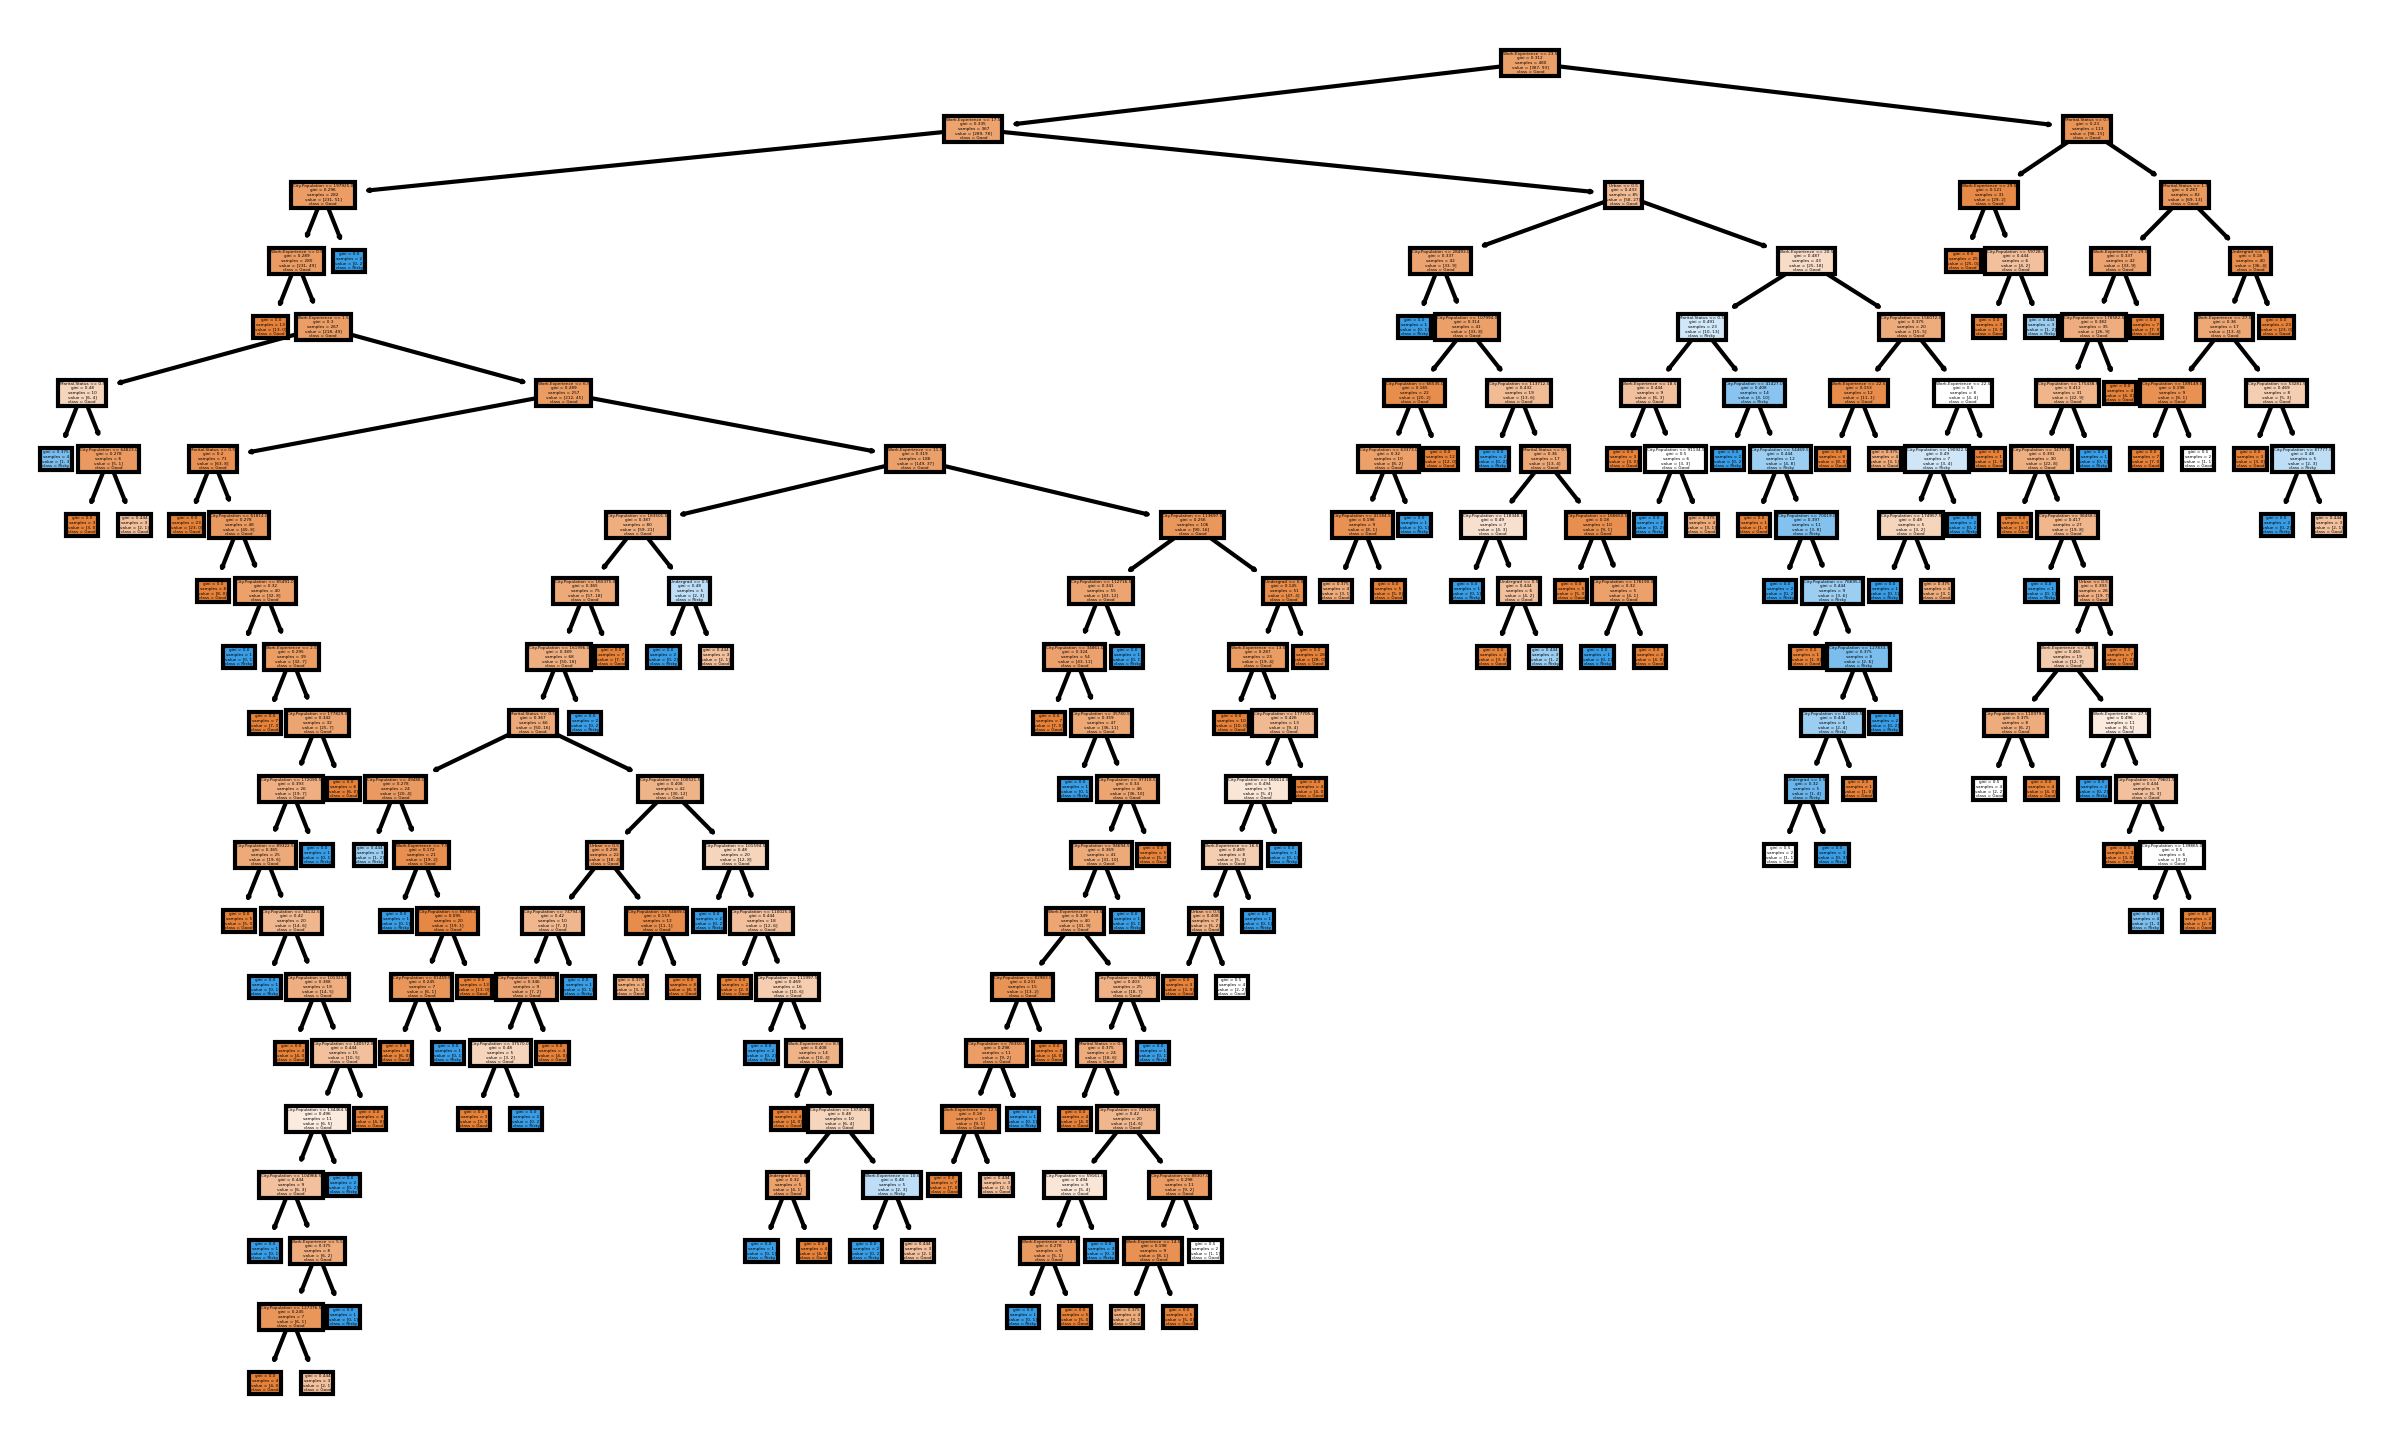

In [36]:
fn=['Undergrad' ,'Marital.Status' ,'City.Population' ,'Work.Experience' ,'Urban']
cn=['Good' ,'Risky']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,6), dpi=300)
tree.plot_tree(model, feature_names = fn, class_names = cn, filled = True);

In [28]:
y_pred = model.predict(X_test)

In [29]:
y_pred

array(['Risky', 'Good', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Risky',
       'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Good',
       'Good', 'Risky', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Risky',
       'Good', 'Good', 'Risky', 'Good', 'Good', 'Risky', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Risky',
       'Risky', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Risky', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Risky', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Risky', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Good'

In [30]:
metrics.accuracy_score(y_pred,y_test)

0.6916666666666667

In [33]:
import seaborn as sn

<Axes: xlabel='Taxable.Income', ylabel='count'>

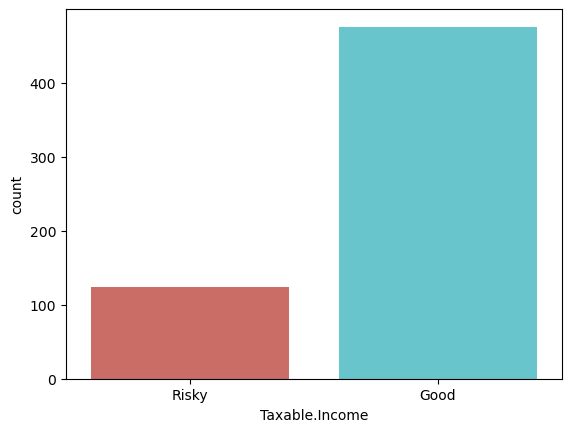

In [34]:
sn.countplot(x="Taxable.Income" ,data=data ,palette="hls")
#using this vizualization we can count how many clients are good and how many are risky

In [35]:
#By observing the countplot above we can conclude that majority of clients are good while there are some clients that are risky